In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv("cleaned_fraud_data.csv")

df.head()

,Country,Major Province/State,Gender,Victim Age Group,Fraud/Cybercrime Category,Solicitation Method,Victim Result
0,Canada,Quebec,Male,'40 - 49,Identity Fraud,Other,1
1,Canada,Saskatchewan,Male,'30 - 39,Phishing,Email,1
2,Canada,Saskatchewan,Male,'60 - 69,Merchandise,Other,1
3,Canada,Ontario,Male,'30 - 39,Phishing,Text message,0
4,Canada,British Columbia,Female,'70 - 79,Identity Fraud,Other,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200066 entries, 0 to 200065
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Country                    200066 non-null  object
 1   Major Province/State       200066 non-null  object
 2   Gender                     200066 non-null  object
 3   Victim Age Group           200066 non-null  object
 4   Fraud/Cybercrime Category  200066 non-null  object
 5   Solicitation Method        200066 non-null  object
 6   Victim Result              200066 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 10.7+ MB


## Preprocessing

In [5]:
# Transform all string values to numerical for feature comlumns (map each value to a number)
from sklearn.preprocessing import LabelEncoder

In [6]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([0, 1])

In [7]:
le_prov_state = LabelEncoder()
df['Major Province/State'] = le_prov_state.fit_transform(df['Major Province/State'])
df["Major Province/State"].unique()

array([14, 15, 11,  1, 18,  0,  2,  4, 13,  7,  9,  5, 17, 12,  8, 10,  3,
       16,  6])

In [8]:
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])
df["Gender"].unique()

array([1, 0, 2])

In [9]:
le_age_group = LabelEncoder()
df['Victim Age Group'] = le_age_group.fit_transform(df['Victim Age Group'])
df["Victim Age Group"].unique()

array([3, 2, 5, 6, 0, 1, 4, 7])

In [10]:
le_fraud_cat = LabelEncoder()
df['Fraud/Cybercrime Category'] = le_fraud_cat.fit_transform(df['Fraud/Cybercrime Category'])
df["Fraud/Cybercrime Category"].unique()

array([ 8, 15, 12, 21, 13, 20,  6,  4,  3, 10, 16, 14, 19,  7,  1,  0,  9,
        2, 18, 11, 17,  5])

In [11]:
le_solic_method = LabelEncoder()
df['Solicitation Method'] = le_solic_method.fit_transform(df['Solicitation Method'])
df["Solicitation Method"].unique()

array([7, 2, 8, 0, 5, 4, 3, 1, 6])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200066 entries, 0 to 200065
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   Country                    200066 non-null  int32
 1   Major Province/State       200066 non-null  int32
 2   Gender                     200066 non-null  int32
 3   Victim Age Group           200066 non-null  int32
 4   Fraud/Cybercrime Category  200066 non-null  int32
 5   Solicitation Method        200066 non-null  int32
 6   Victim Result              200066 non-null  int64
dtypes: int32(6), int64(1)
memory usage: 6.1 MB


In [13]:
from sklearn.feature_selection import chi2

X_chi = df.drop(['Victim Result'],axis=1)
y_chi = df['Victim Result']

chi_scores= chi2(X_chi,y_chi)
chi_scores

(array([9.56314617e+00, 3.47745303e+02, 4.14365073e+01, 8.24485880e+03,
        4.89354658e+02, 5.17285149e+04]),
 array([1.98522576e-003, 1.31261188e-077, 1.21762083e-010, 0.00000000e+000,
        1.96893468e-108, 0.00000000e+000]))

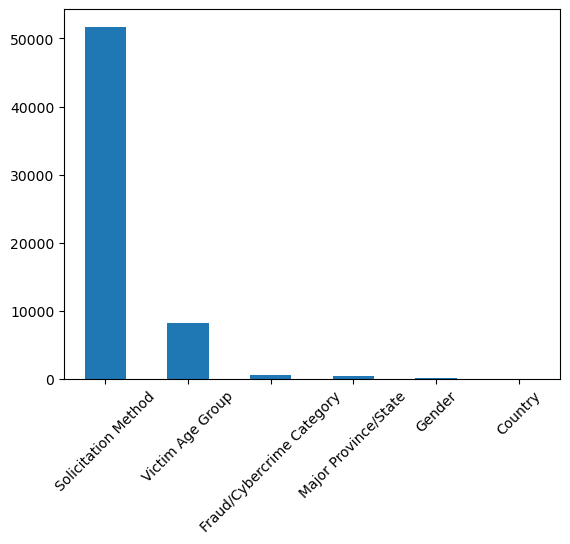

In [159]:
#higher the chi value. higher the importance

chi_values = pd.Series(chi_scores[0], index=X_chi.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()
plt.xticks(rotation=45)
plt.show()

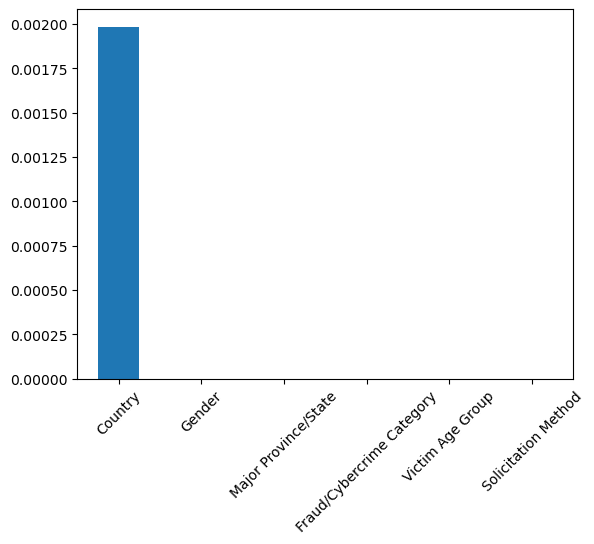

In [161]:
#higher the p value. lower the importance

p_values = pd.Series(chi_scores[1], index=X_chi.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()
plt.xticks(rotation=45)
plt.show()

"Country" P-value is highest, but still less than 0.05

In [17]:
# Split data into X (features) and y (label)

X = df.drop(['Victim Result'],axis=1)
y = df['Victim Result']

In [18]:
# Split data into train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

In [19]:
# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Model Building

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV

log_model = LogisticRegressionCV(cv=5, random_state=101, max_iter=1000)
log_model1 = LogisticRegressionCV(cv=5, random_state=101, max_iter=1000)

In [23]:
log_model.fit(scaled_X_train, y_train)

LogisticRegressionCV(cv=5, max_iter=1000, random_state=101)

In [24]:
print("The best performing C value is: ", log_model.C_)

The best performing C value is:  [0.35938137]


In [25]:
# Model coefficients
coefs = log_model.coef_
coefs

array([[ 0.01889367, -0.02507545, -0.00377946, -0.28982433,  0.01206407,
         0.75856375]])

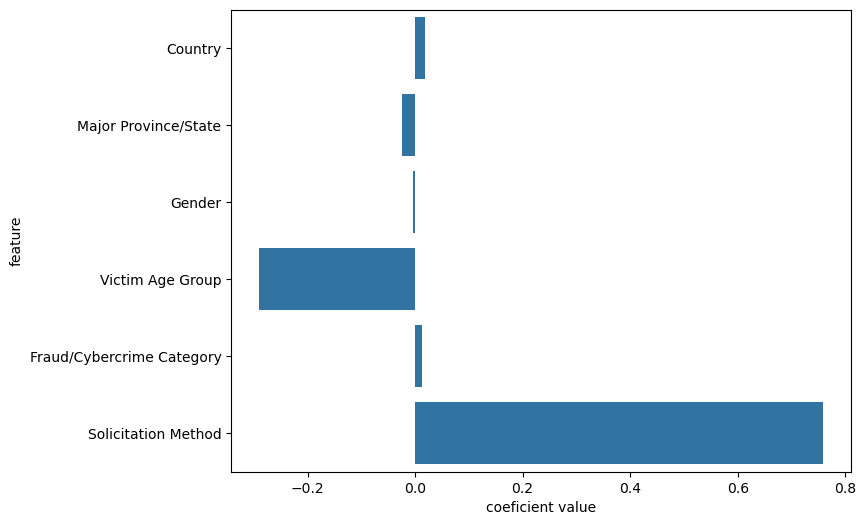

In [26]:
# Barplot of coefficients
features_names = X_train.columns

plt.figure(figsize=(8,6))
sns.barplot(x=coefs[0], y=features_names)
plt.xlabel('coeficient value')
plt.ylabel('feature')
plt.show()

In [27]:
# Check for overfitting and underfitting

# Compare train and test scores

print('Training set score: {:.4f}'.format(log_model.score(scaled_X_train, y_train)))

print('Test set score: {:.4f}'.format(log_model.score(scaled_X_test, y_test)))

Training set score: 0.7397
Test set score: 0.7423


In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay

y_pred = log_model.predict(scaled_X_test)

In [29]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.31      0.41      5667
           1       0.77      0.91      0.84     14340

    accuracy                           0.74     20007
   macro avg       0.68      0.61      0.62     20007
weighted avg       0.72      0.74      0.71     20007



### Logistic Regression using SMOTE
SMOTE technique from the imblearn library will be used for oversampling the minor class.

In [31]:
# !pip install imblearn

In [32]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X1_train, y1_train = oversample.fit_resample(X_train, y_train)

In [33]:
scaled_X1_train = scaler.fit_transform(X1_train)

In [34]:
log_model1.fit(scaled_X1_train, y1_train)

LogisticRegressionCV(cv=5, max_iter=1000, random_state=101)

In [35]:
# Check for overfitting and underfitting

# Compare train and test scores

print('Training set score: {:.4f}'.format(log_model1.score(scaled_X1_train, y1_train)))

print('Test set score: {:.4f}'.format(log_model1.score(scaled_X_test, y_test)))

Training set score: 0.6926
Test set score: 0.6643


In [36]:
y1_pred = log_model1.predict(scaled_X_test)

In [37]:
# Classification Report
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

           0       0.44      0.74      0.56      5667
           1       0.86      0.63      0.73     14340

    accuracy                           0.66     20007
   macro avg       0.65      0.69      0.64     20007
weighted avg       0.74      0.66      0.68     20007



### Decision Tree Classifier with Gini Index 

In [39]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0, class_weight='balanced')

# Fit the model
clf_gini.fit(scaled_X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=0)

In [40]:
y_pred_gini = clf_gini.predict(scaled_X_test)

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8016


In [41]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(scaled_X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(scaled_X_test, y_test)))

Training set score: 0.7986
Test set score: 0.8016


In [42]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.61      0.80      0.70      5667
           1       0.91      0.80      0.85     14340

    accuracy                           0.80     20007
   macro avg       0.76      0.80      0.77     20007
weighted avg       0.83      0.80      0.81     20007



### Decision Tree Classifier with Entropy

In [44]:
# Instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0, class_weight='balanced')

# Fit model
clf_en.fit(scaled_X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, random_state=0)

In [45]:
y_pred_en = clf_en.predict(scaled_X_test)

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8103


In [46]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(scaled_X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(scaled_X_test, y_test)))

Training set score: 0.8139
Test set score: 0.8103


In [47]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.62      0.86      0.72      5667
           1       0.93      0.79      0.86     14340

    accuracy                           0.81     20007
   macro avg       0.78      0.82      0.79     20007
weighted avg       0.84      0.81      0.82     20007



### Random Forest Classifier

In [49]:
# Import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# Create instance of model with default values
rfc = RandomForestClassifier(random_state=0, n_estimators=200)

# Fit  model
rfc.fit(scaled_X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [50]:
y_pred = rfc.predict(scaled_X_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score with 200 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 200 decision-trees : 0.8301


In [51]:
# View feature scores

feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Fraud/Cybercrime Category    0.444134
Solicitation Method          0.386233
Victim Age Group             0.084407
Major Province/State         0.064294
Gender                       0.019050
Country                      0.001882
dtype: float64

In [52]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71      5667
           1       0.89      0.87      0.88     14340

    accuracy                           0.83     20007
   macro avg       0.79      0.80      0.79     20007
weighted avg       0.83      0.83      0.83     20007



## Final Model
Random Forest Classifier will be used as it performs the best

In [123]:
# Hypertune parameters to see if any further improvement


rfc_final_model = RandomForestClassifier(random_state=0, n_estimators=200, criterion='entropy', max_depth=10 )

# Fit  model
rfc_final_model.fit(scaled_X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       random_state=0)

In [124]:
y_pred_final = rfc_final_model.predict(scaled_X_test)

print('Final Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_final)))

Final Model accuracy score: 0.8312


In [127]:
# Check for overfitting and underfitting

# Compare train and test scores

print('Training set score: {:.4f}'.format(rfc_final_model.score(scaled_X_train, y_train)))

print('Test set score: {:.4f}'.format(rfc_final_model.score(scaled_X_test, y_test)))

Training set score: 0.8301
Test set score: 0.8312


These two values are quite comparable. So, there is no sign of overfitting.

In [130]:
# Confusion Matrix for final model
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_final)

print(cm)

[[ 3936  1731]
 [ 1647 12693]]


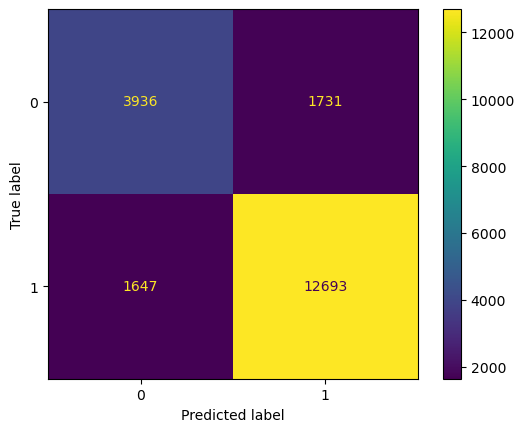

In [132]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm, display_labels=rfc_final_model.classes_)
disp.plot()
plt.show()

In [134]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70      5667
           1       0.88      0.89      0.88     14340

    accuracy                           0.83     20007
   macro avg       0.79      0.79      0.79     20007
weighted avg       0.83      0.83      0.83     20007



## New Input

In [163]:
X.head(1)

,Country,Major Province/State,Gender,Victim Age Group,Fraud/Cybercrime Category,Solicitation Method
0,0,14,1,3,8,7


In [140]:
# Country, Major Province/State, Gender, Victim Age Group, Fraud/Cybercrime Category, Solicitation Method

X_input = np.array([["Canada", "Quebec", "Male", "'30 - 39", "Identity Fraud", "Email" ]])
X_input

array([['Canada', 'Quebec', 'Male', "'30 - 39", 'Identity Fraud',
        'Email']], dtype='<U14')

In [142]:
# Apply label encoders

X_input[:, 0] = le_country.transform(X_input[:,0])
X_input[:, 1] = le_prov_state.transform(X_input[:,1])
X_input[:, 2] = le_gender.transform(X_input[:,2])
X_input[:, 3] = le_age_group.transform(X_input[:,3])
X_input[:, 4] = le_fraud_cat.transform(X_input[:,4])
X_input[:, 5] = le_solic_method.transform(X_input[:,5])

X_input = X_input.astype(float)
X_input

array([[ 0., 14.,  1.,  2.,  8.,  2.]])

In [149]:
scaled_X_input = scaler.transform(X_input)

C:\Users\egagn\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [151]:
# Prediction

y_input_pred = rfc_final_model.predict(scaled_X_input)
y_input_pred

array([1], dtype=int64)

## Export Model

In [147]:
import pickle

In [153]:
# Save model, Scalar and Encoders

data = {"model": rfc_final_model, "le_country": le_country, "le_prov_state": le_prov_state, "le_gender": le_gender, "le_age_group": le_age_group, 
       "le_fraud_cat": le_fraud_cat, "le_solic_method": le_solic_method, "scaler": scaler}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [155]:
# Open saved data

with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

model_loaded = data["model"]
le_country = data["le_country"]
le_prov_state = data["le_prov_state"]
le_gender = data["le_gender"]
le_age_group = data["le_age_group"]
le_fraud_cat = data["le_fraud_cat"]
le_solic_method = data["le_solic_method"]
scaler_loaded = data["scaler"]

In [157]:
y_pred = model_loaded.predict(scaled_X_input)
y_pred

# Same prediction as earlier

array([1], dtype=int64)